In [1]:
import pandas as pd
import numpy as np
from linear_regression_utils import linear_regression_model, predict, plt_gradients, cost_function
from helper_functions import plot_learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_theme()

In [2]:
salary = pd.read_csv("dataset/Experience-Salary.csv")
salary

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [3]:
salary.corr()["salary(in thousands)"]

exp(in months)          0.810969
salary(in thousands)    1.000000
Name: salary(in thousands), dtype: float64

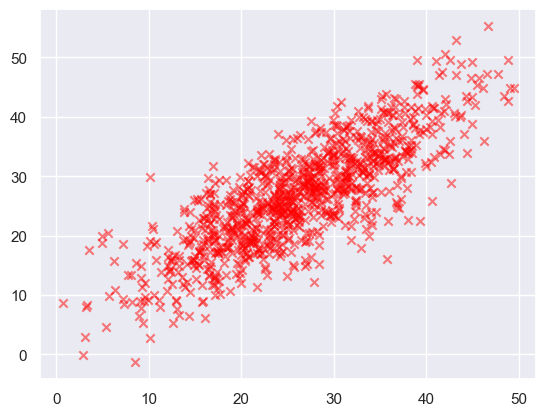

In [4]:
plt.scatter(data=salary,x="exp(in months)", y="salary(in thousands)", color="red", marker="x", alpha=0.5, label="salary(in thousands)")

In [5]:
X = salary.iloc[:, :1]
y = salary.iloc[:, -1]

In [6]:
X

,exp(in months)
0,18.290293
1,17.023407
2,26.343613
3,19.105834
4,27.742516
...,...
995,22.161741
996,32.266497
997,17.039030
998,25.222124


In [7]:
y

0      16.521825
1      11.666234
2      23.167255
3      20.877145
4      23.166236
         ...    
995    24.666502
996    24.160270
997    19.903797
998    21.974413
999    19.634787
Name: salary(in thousands), Length: 1000, dtype: float64

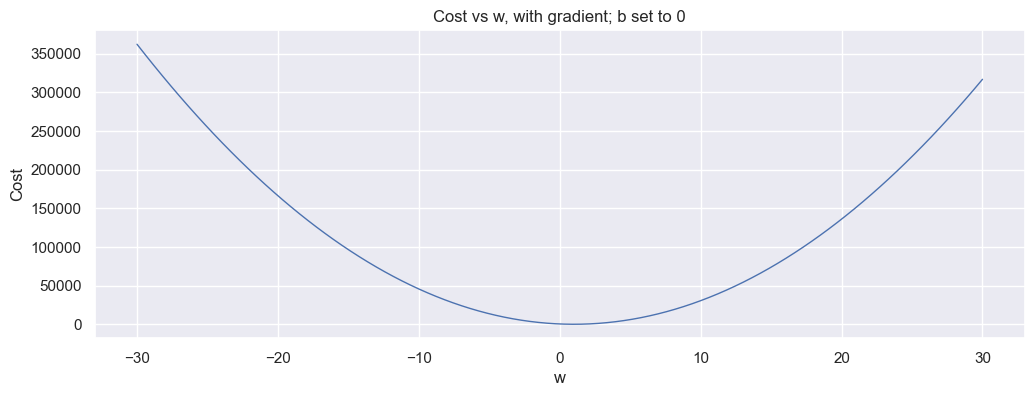

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt_gradients(X_train, y_train, cost_function, w_start=-30, w_end=30, w_step=100, b_value=0)

In [9]:
# Simple gradient descent to find w and b
result = linear_regression_model(X_train, y_train, X_test, y_test, learning_rate=0.00265, print_cost=True, num_iterations=50000)
new_w = result["w"]
new_b = result["b"]

Initial weights: [-2.5]
Cost for iterate no 1000: 2808.1172986956744 with w = [3.67992932] and b = 1.3388316296820593
Cost for iterate no 2000: 1702.551189117904 with w = [3.04497983] and b = 2.177450305153778
Cost for iterate no 3000: 1034.3174320336036 with w = [2.55169023] and b = 2.8192143987949425
Cost for iterate no 4000: 630.4189634401499 with w = [2.1684516] and b = 3.310329875409117
Cost for iterate no 5000: 386.291802526037 with w = [1.87070894] and b = 3.686157848901519
Cost for iterate no 6000: 238.73470973779186 with w = [1.63938676] and b = 3.9737597920473795
Cost for iterate no 7000: 149.54717241002507 with w = [1.45966618] and b = 4.193845436819845
Cost for iterate no 8000: 95.63977758664677 with w = [1.32003492] and b = 4.362263534366899
Cost for iterate no 9000: 63.0566624276129 with w = [1.21154942] and b = 4.491142752247448
Cost for iterate no 10000: 43.36252578050971 with w = [1.12726157] and b = 4.5897648128656545
Cost for iterate no 11000: 31.45884224612345 with 

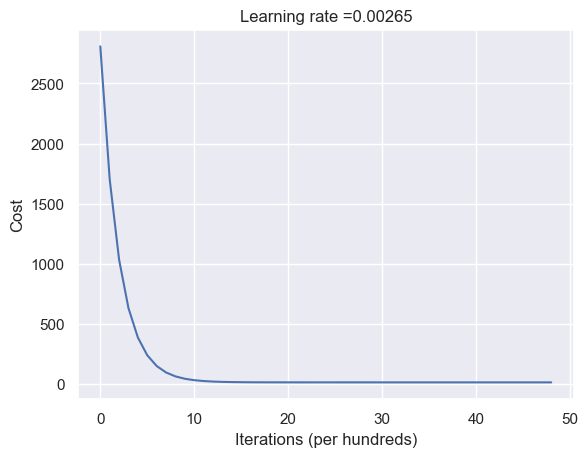

In [10]:
plot_learning_curve(result["cost_history"], result["learning_rate"])

In [11]:
new_w
new_b

4.911169110790749

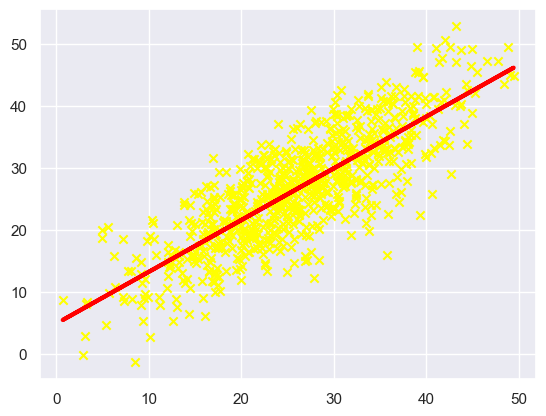

In [12]:
plt.scatter(x=X_train, y=y_train, c="yellow", marker="x")
plt.plot(X_train, predict(X_train, new_w, new_b), linewidth=3, color="red")
plt.show()

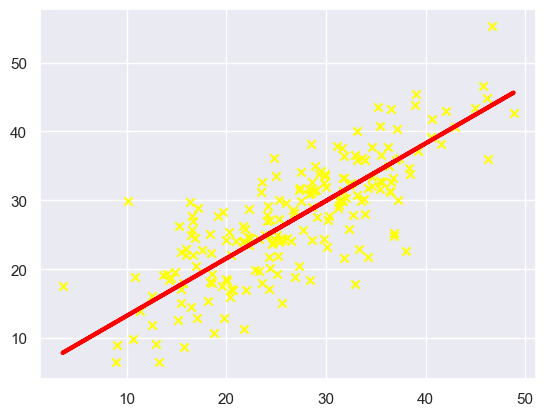

In [13]:
plt.scatter(x=X_test, y=y_test, c="yellow", marker="x")
plt.plot(X_test, predict(X_test, new_w, new_b), linewidth=3, color="red")
plt.show()